In [22]:
# lstm autoencoder recreate sequence
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Activation
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [49]:
def pre_data(file,n_timestep,n_features):
    X = pd.read_csv(file)
    
    X_data = X.values[:,-1-n_features:-1]
    X_data = StandardScaler().fit_transform(X_data) 
    X_data = MinMaxScaler().fit_transform(X_data) 
    n_examples = int(np.shape(X_data)[0]/n_timestep)
    
    X_data = np.reshape(X_data, (n_examples,n_timestep,n_features))
    
    print (np.shape(X_data))
    return (X_data)

C:\Users\yizhe\AppData\Local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yizhe\AppData\Local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(3810, 128, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 100)               44400     
_________________________________________________________________
repeat_vector_16 (RepeatVect (None, 128, 100)          0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 128, 100)          80400     
_________________________________________________________________
time_distributed_16 (TimeDis (None, 128, 10)           1010      
_________________________________________________________________
activation_9 (Activation)    (None, 128, 10)           0         
Total params: 125,810
Trainable params: 125,810
Non-trainable params: 0
_________________________________________________________________
Train on 2667 samples, validate on 1143 samples
Epoch 1/200
2667/2667 [==============================] - 29s 11ms/step -

2667/2667 [==============================] - 26s 10ms/step - loss: 5.0912e-04 - val_loss: 6.4437e-04
Epoch 67/200
2667/2667 [==============================] - 26s 10ms/step - loss: 5.6611e-04 - val_loss: 6.3277e-04
Epoch 68/200
2667/2667 [==============================] - 26s 10ms/step - loss: 5.0754e-04 - val_loss: 6.3817e-04
Epoch 69/200
2667/2667 [==============================] - 26s 10ms/step - loss: 5.0020e-04 - val_loss: 6.2485e-04
Epoch 70/200
2667/2667 [==============================] - 26s 10ms/step - loss: 5.9453e-04 - val_loss: 7.3585e-04
Epoch 71/200
2667/2667 [==============================] - 26s 10ms/step - loss: 5.3425e-04 - val_loss: 7.0653e-04
Epoch 72/200
2667/2667 [==============================] - 26s 10ms/step - loss: 5.1310e-04 - val_loss: 6.7065e-04
Epoch 73/200
2667/2667 [==============================] - 26s 10ms/step - loss: 5.1780e-04 - val_loss: 6.0910e-04
Epoch 74/200
2667/2667 [==============================] - 26s 10ms/step - loss: 4.7193e-04 - val_loss

2667/2667 [==============================] - 26s 10ms/step - loss: 3.6355e-04 - val_loss: 5.1276e-04
Epoch 138/200
2667/2667 [==============================] - 25s 10ms/step - loss: 3.5966e-04 - val_loss: 5.1171e-04
Epoch 139/200
2667/2667 [==============================] - 26s 10ms/step - loss: 3.7112e-04 - val_loss: 4.7328e-04
Epoch 140/200
2667/2667 [==============================] - 26s 10ms/step - loss: 3.5128e-04 - val_loss: 4.7560e-04
Epoch 141/200
2667/2667 [==============================] - 26s 10ms/step - loss: 3.5710e-04 - val_loss: 5.2698e-04
Epoch 142/200
2667/2667 [==============================] - 26s 10ms/step - loss: 3.5116e-04 - val_loss: 4.9839e-04
Epoch 143/200
2667/2667 [==============================] - 26s 10ms/step - loss: 3.5562e-04 - val_loss: 4.7093e-04
Epoch 144/200
2667/2667 [==============================] - 26s 10ms/step - loss: 3.7209e-04 - val_loss: 4.8100e-04
Epoch 145/200
2667/2667 [==============================] - 25s 10ms/step - loss: 3.5582e-04 - 

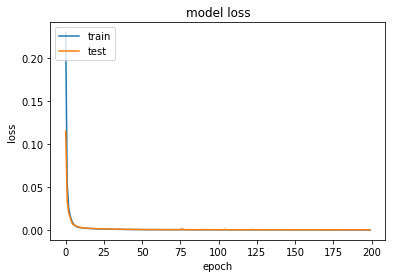

In [83]:
file = 'Data/X_train.csv'
n_timestep = 128
n_features = 10

sequence = pre_data(file,n_timestep,n_features)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_timestep,n_features)))
model.add(RepeatVector(n_timestep)) # repeat the same output for n_timestep times (upsampling)
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.add(Activation('tanh'))
model.summary()
optimizer_Adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer_Adam, loss='mse')
# fit model
history = model.fit(sequence, sequence, epochs=200, batch_size =50, validation_split = 0.3, verbose=1)


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

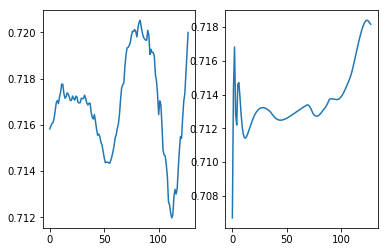

In [96]:
test_ex = sequence[48,:,:]
test_ex = np.expand_dims(test_ex, axis = 0)
y_pred = model.predict(test_ex)

k = 3
plt.subplot(121)
plt.plot(np.squeeze(test_ex[:,:,k]))
plt.subplot(122)
plt.plot(np.squeeze(y_pred[:,:,k]))